In [4]:
import chess
import chess.pgn
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import time
from sklearn import preprocessing

In [5]:
path = 'lichess_NotGmSule_2023-02-01.pgn'

In [6]:
file = open(path, encoding="utf-8")
games = []
a = chess.pgn.read_game(file)
while a:
    games.append(a)
    try:
        a = chess.pgn.read_game(file)
    except:
        print(f'could not read game number {len(games)}')

In [7]:
def make_move(uci):
    '''
    returns the two postions of the uci(Universal Chess Interface) format
    '''
    pos1 = uci[:2]
    pos2 = uci[2:4]
    return (chess.parse_square(pos1), chess.parse_square(pos2))


In [8]:
def get_moves(game):
    moves = []
    for i in game.mainline_moves():
        moves.append(i)
    return moves

In [9]:
import numpy as np
import chess

def get_piece_type(piece):
    # Helper function to get the type of a chess piece (with color information)
    if piece is None:
        return None
    elif piece.color == chess.WHITE:
        if piece.piece_type == chess.PAWN:
            return 'P'
        elif piece.piece_type == chess.KNIGHT:
            return 'N'
        elif piece.piece_type == chess.BISHOP:
            return 'B'
        elif piece.piece_type == chess.ROOK:
            return 'R'
        elif piece.piece_type == chess.QUEEN:
            return 'Q'
        elif piece.piece_type == chess.KING:
            return 'K'
    elif piece.color == chess.BLACK:
        if piece.piece_type == chess.PAWN:
            return 'p'
        elif piece.piece_type == chess.KNIGHT:
            return 'n'
        elif piece.piece_type == chess.BISHOP:
            return 'b'
        elif piece.piece_type == chess.ROOK:
            return 'r'
        elif piece.piece_type == chess.QUEEN:
            return 'q'
        elif piece.piece_type == chess.KING:
            return 'k'

def get_board_matrix(board_state):
    # Initialize an 8x8 matrix to represent the board
    matrix = np.zeros((8, 8), dtype=str)

    # Parse the board_state string to obtain the positions of the pieces on the board
    board = chess.Board(board_state)
    for row in range(8):
        for col in range(8):
            # Get the square index corresponding to the current row and column
            square = chess.square(col, 7 - row)

            # Get the type of the piece occupying the current square (if any)
            piece_type = get_piece_type(board.piece_at(square))

            # Store the piece type in the matrix
            matrix[row][col] = piece_type or '.'

    return matrix


In [10]:
get_board_matrix(games[0].board().fen())

array([['r', 'n', 'b', 'q', 'k', 'b', 'n', 'r'],
       ['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p'],
       ['.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.'],
       ['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P'],
       ['R', 'N', 'B', 'Q', 'K', 'B', 'N', 'R']], dtype='<U1')

In [11]:
le = preprocessing.LabelEncoder()
le.fit_transform(get_board_matrix(games[0].board().fen()).flatten())

array([12,  9,  7, 11,  8,  7,  9, 12, 10, 10, 10, 10, 10, 10, 10, 10,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  4,  4,
        4,  4,  4,  4,  4,  6,  3,  1,  5,  2,  1,  3,  6], dtype=int64)

In [12]:

def label_encode_game(game):
    board = game.board()
    moves = get_moves(game)
    encoded_moves = []
    for move in moves:
        board.push(move)
        encoded_moves.append(le.fit_transform(get_board_matrix(board.fen()).flatten()))
    return encoded_moves

In [17]:
game_0 = label_encode_game(games[0])
game_0[0]

array([12,  9,  7, 11,  8,  7,  9, 12, 10, 10, 10, 10, 10, 10, 10, 10,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  4,  4,
        4,  0,  4,  4,  4,  6,  3,  1,  5,  2,  1,  3,  6], dtype=int64)

In [139]:
data = []
# add data to test
for game in games[0]:
    encoded_game = label_encode_game(game)
    for i in range(len(encoded_game)-1):
        x = encoded_game[i]
        y = get_moves(game)[i+1]
        uci_move = y.uci()
        moves = make_move(uci_move)
        x = x.reshape(1, 64)
        data.append([x, moves])


x = data[0][0]
y = data[0][1]

# make an array of array of x
x = np.array([i[0] for i in data])
y = np.array([i[1] for i in data])

print(x.shape)
print(y.shape)
print(x[0][0].shape)



(50, 1, 64)
(50, 2)
(64,)


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 64)                0         
                                                                 
 dense_59 (Dense)            (None, 64)                4160      
                                                                 
 dense_60 (Dense)            (None, 32)                2080      
                                                                 
 dense_61 (Dense)            (None, 2)                 66        
                                                                 
Total params: 6,306
Trainable params: 6,306
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
3/3 [==============================] - 1s 145ms/step - loss: 140.9987 - accuracy: 0.5500 - val_loss: 33.5760 - val_accuracy: 0.7000
Epoch 2/5
3/3 [==========================

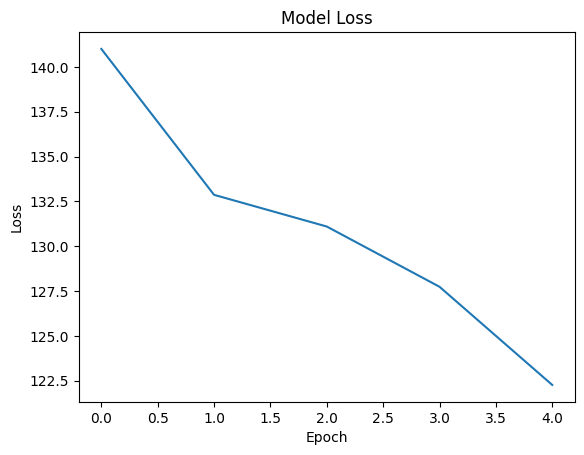

In [141]:
import tensorflow as tf

# Define the input shape
input_shape = (1, 64)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(x, y, batch_size=16, epochs=5, validation_split=0.2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()





In [143]:
# make a random board state in form of a matrix
labeled_game = label_encode_game(games[0])
matrix = labeled_game[0]
matrix = matrix.reshape(1, 1, 64)


val = model.predict(matrix)
# round val
val = int(np.round(val))




1/1 [==============================] - 0s 21ms/step


TypeError: only size-1 arrays can be converted to Python scalars